# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

# Mini Project IV
## Objective

- Data Exploration
- Data Cleaning
- Feature Engineering
- Model Building
- Building a Pipeline
- Deploy the model to the cloud

### Data  Exploration

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import requests
df = pd.read_csv("data_loan.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Unbalanced Data

In [2]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [4]:
# df_class_y.sample(350,replace=True,random_state=47)
df_class_y = df[df.Loan_Status == 'Y']
df_class_n = df[df.Loan_Status == 'N']
df_class_0_same = df_class_n.sample(400,replace=True,random_state=47)
df_1= pd.concat([df_class_y,df_class_0_same],ignore_index=True)
df_1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [5]:
# After bootstrapping
df_1.Loan_Status.value_counts()

Y    422
N    400
Name: Loan_Status, dtype: int64

In [6]:
# df_class_0_under = df_class_0.sample(492,random_state=47)
# df2= pd.concat([df_class_1,df_class_0_under],ignore_index=True)
# df_1 =df.copy()

In [7]:
df_1.Gender = df_1.Gender.fillna('not_given')
df_1.Married = df_1.Married.fillna('not_given')
df_1.Self_Employed = df_1.Self_Employed.fillna('not_given')
df_1.LoanAmount = df_1.LoanAmount.fillna(999)
df_1.Loan_Amount_Term = df_1.Loan_Amount_Term.fillna(999)
df_1.Credit_History = df_1.Credit_History.fillna(2.0)
df_1 = df_1.dropna(subset=['Dependents']).reset_index(drop=True)

In [8]:
df_1.isnull().mean()

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [9]:
df_1[df_1.Credit_History.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


### Feature Engineering 

In [10]:
df_1['applicantotal_income'] = df_1['ApplicantIncome'] + df_1['CoapplicantIncome']
df_1['applicantotal_income_cat'] = pd.qcut(df_1['applicantotal_income'],q=4,labels=[1, 2, 3,4])
df_1['ApplicantIncome_cat'] = pd.qcut(df_1['ApplicantIncome'],q=4,labels=[1, 2, 3,4])

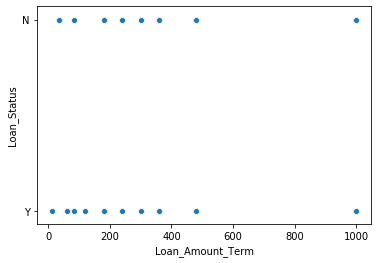

In [11]:
sns.scatterplot(x='Loan_Amount_Term',y='Loan_Status',data=df_1)

Look at some basic statistics for numerical variables.

In [12]:
from sklearn.preprocessing import LabelEncoder
labelenmkt = LabelEncoder()

In [13]:
# labelenmkt.fit_transform(df_1)
encod = df_1.select_dtypes(include=['object']).drop(columns=['Loan_ID']).columns.to_list()
for x in encod:
    df_1[f'{x}_cat'] = labelenmkt.fit_transform(df_1[x])
df_1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,applicantotal_income,applicantotal_income_cat,ApplicantIncome_cat,Gender_cat,Married_cat,Dependents_cat,Education_cat,Self_Employed_cat,Property_Area_cat,Loan_Status_cat
0,LP001002,Male,No,0,Graduate,No,5849,0.0,999.0,360.0,...,5849.0,3,4,1,0,0,0,0,2,1
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,...,3000.0,1,2,1,1,0,0,1,2,1
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,...,4941.0,2,1,1,1,0,1,0,2,1
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,...,6000.0,3,4,1,0,0,0,0,2,1
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,...,9613.0,4,3,1,1,2,0,1,2,1


In [14]:
df_numeric = df_1.select_dtypes(exclude='object')
df_numeric.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,applicantotal_income,applicantotal_income_cat,ApplicantIncome_cat,Gender_cat,Married_cat,Dependents_cat,Education_cat,Self_Employed_cat,Property_Area_cat,Loan_Status_cat
0,5849,0.0,999.0,360.0,1.0,5849.0,3,4,1,0,0,0,0,2,1
1,3000,0.0,66.0,360.0,1.0,3000.0,1,2,1,1,0,0,1,2,1
2,2583,2358.0,120.0,360.0,1.0,4941.0,2,1,1,1,0,1,0,2,1
3,6000,0.0,141.0,360.0,1.0,6000.0,3,4,1,0,0,0,0,2,1
4,5417,4196.0,267.0,360.0,1.0,9613.0,4,3,1,1,2,0,1,2,1


In [15]:
# df_numeric = pd.get_dummies(df_numeric,columns=['Married_cat','Gender_cat'])
# new_df = pd.get_dummies(new_df,columns=['dayof_theweek'])
# sc = preprocessing.Normalizer()

hope


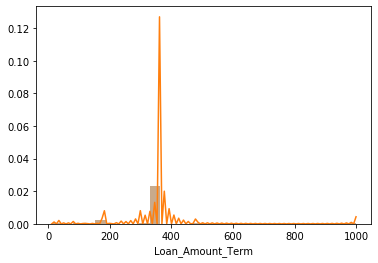

In [17]:
from scipy.stats import norm
# sns.distplot(df_numeric['ApplicantIncome'])
try:
    sns.distplot(df_numeric['Loan_Amount_Term'])
except RuntimeError as re:
    if str(re).startswith("Selected KDE bandwidth is 0. Cannot"):
        sns.distplot(df_numeric['Loan_Amount_Term'], kde_kws={'bw': 0.1})
        print('hope')
    else:
        raise re

In [18]:
df_numeric.columns.to_list()

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'applicantotal_income',
 'applicantotal_income_cat',
 'ApplicantIncome_cat',
 'Gender_cat',
 'Married_cat',
 'Dependents_cat',
 'Education_cat',
 'Self_Employed_cat',
 'Property_Area_cat',
 'Loan_Status_cat']

### Understanding the Data

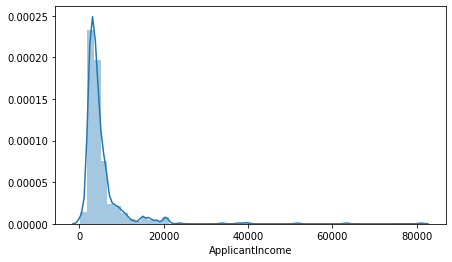

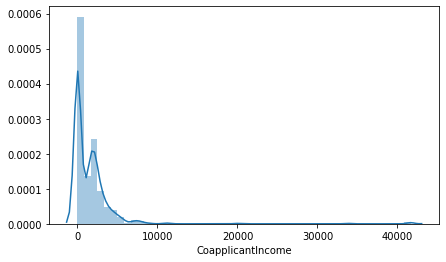

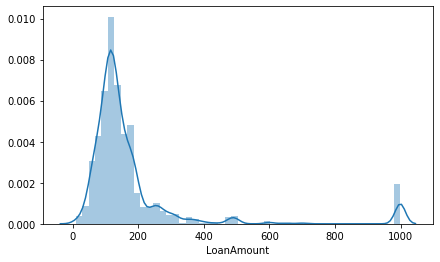

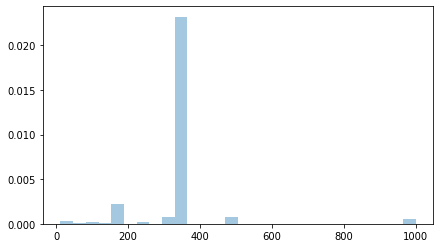

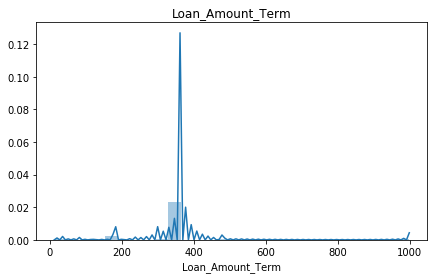

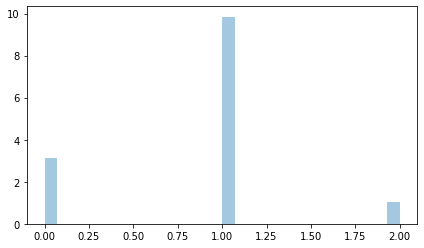

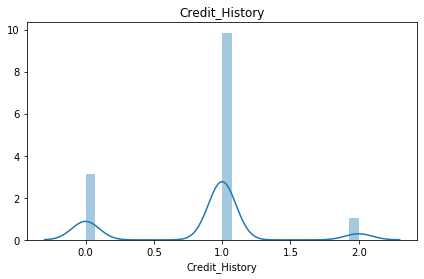

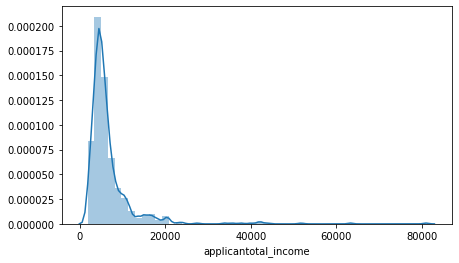

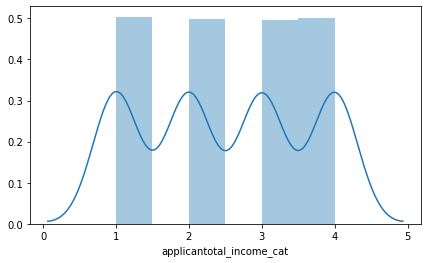

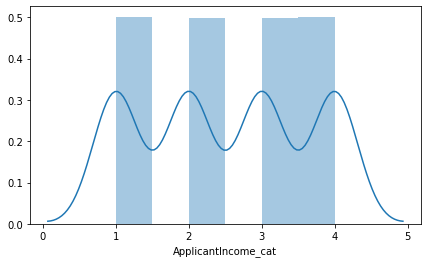

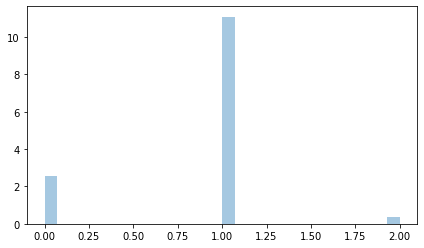

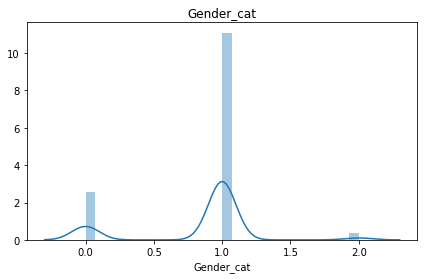

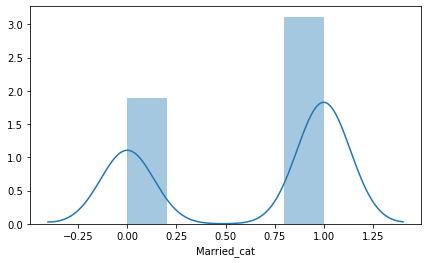

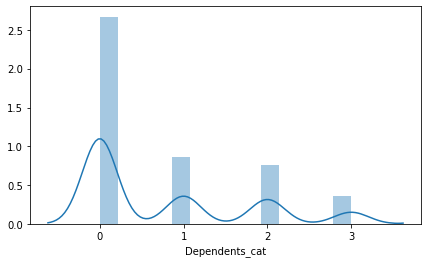

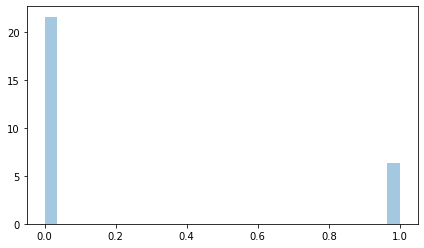

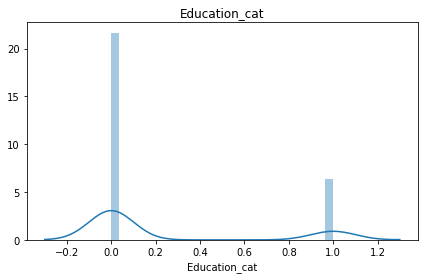

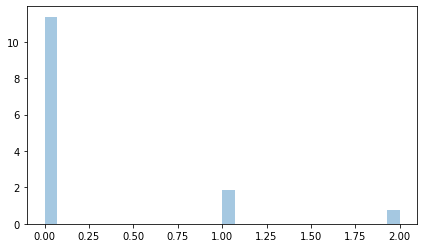

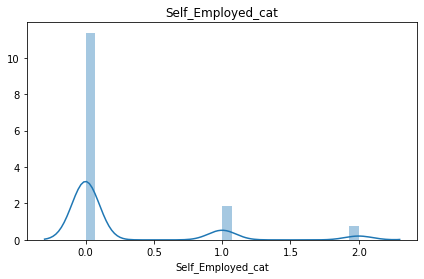

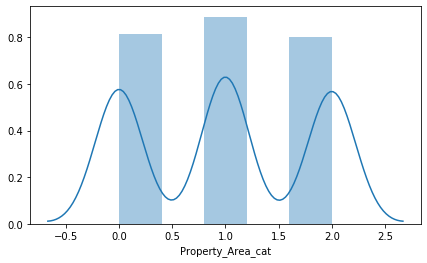

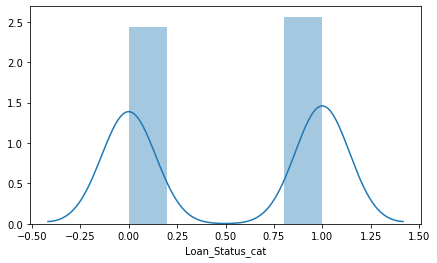

In [73]:
for x in df_numeric.columns.to_list():
    try:
        plt.figure(figsize=(7,4))
        sns.distplot(df_numeric[x])
        plt.show();
    except RuntimeError as re:
        if str(re).startswith("Selected KDE bandwidth is 0. Cannot"):
            plt.figure(figsize=(7, 4))
            sns.distplot(df_numeric[x], kde_kws={'bw': 0.1}).set_title(f'{x}')
            plt.show();
        else:raise re

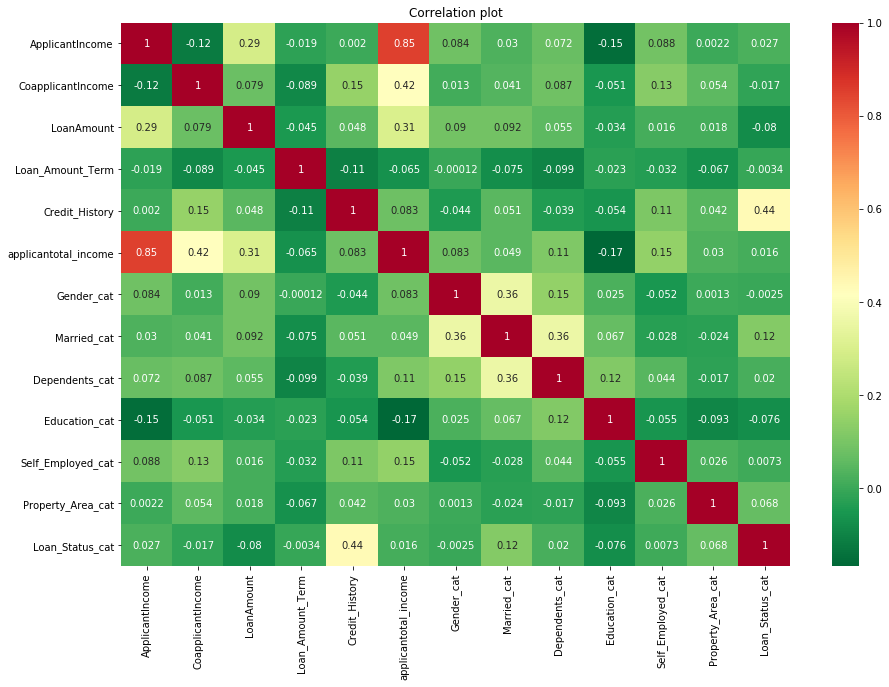

In [78]:
df_corr = df_numeric.corr()
plt.figure(figsize=(15,10))
sns.heatmap(df_corr,annot=True,cmap="RdYlGn_r").set_title('Correlation plot',fontsize= 8)
plt.title('Correlation plot')  
plt.show;

In [21]:
import math

In [22]:
w = 3812
n = math.ceil((df_numeric['ApplicantIncome'].max() - df_numeric['ApplicantIncome'].min())/w)
# range(0, df_numeric['ApplicantIncome'].max(), 4)

In [23]:
df['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

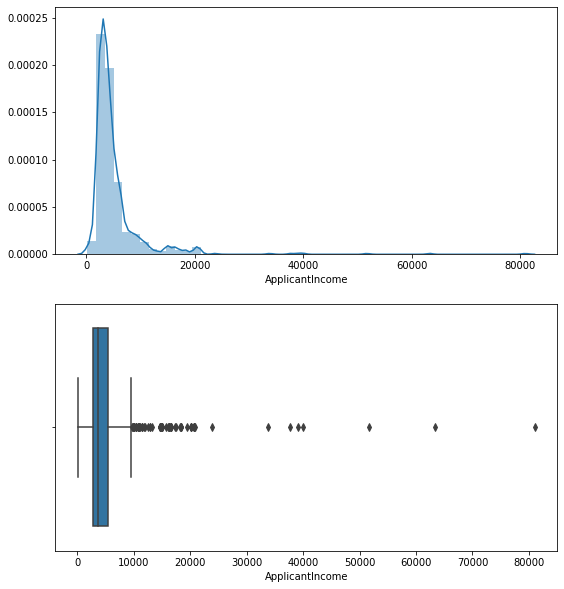

In [24]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(9,10))
sns.distplot(df_numeric['ApplicantIncome'],ax =ax1)
sns.boxplot(df_numeric['ApplicantIncome'],ax=ax2)
plt.show();

In [25]:
# pd.cut(x=df_numeric['ApplicantIncome'], bins=[20, 29, 39, 49], labels=['20s', '30s', '40s'])
bb = pd.qcut(df_numeric['ApplicantIncome'],q=4,labels=[1, 2, 3,4]).to_frame()
bb.head()

,ApplicantIncome
0,4
1,2
2,1
3,4
4,3


### After binning the Applicant Income new distribusion

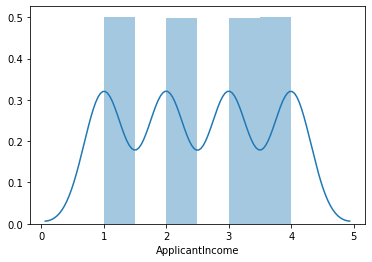

In [26]:
sns.distplot(bb['ApplicantIncome']);

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



In [27]:
df_numeric

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,applicantotal_income,applicantotal_income_cat,ApplicantIncome_cat,Gender_cat,Married_cat,Dependents_cat,Education_cat,Self_Employed_cat,Property_Area_cat,Loan_Status_cat
0,5849,0.0,999.0,360.0,1.0,5849.0,3,4,1,0,0,0,0,2,1
1,3000,0.0,66.0,360.0,1.0,3000.0,1,2,1,1,0,0,1,2,1
2,2583,2358.0,120.0,360.0,1.0,4941.0,2,1,1,1,0,1,0,2,1
3,6000,0.0,141.0,360.0,1.0,6000.0,3,4,1,0,0,0,0,2,1
4,5417,4196.0,267.0,360.0,1.0,9613.0,4,3,1,1,2,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,11500,0.0,286.0,360.0,0.0,11500.0,4,4,0,1,1,0,1,2,0
802,2309,1255.0,125.0,360.0,0.0,3564.0,1,1,1,1,2,1,0,0,0
803,3166,2064.0,104.0,360.0,0.0,5230.0,3,2,1,1,0,0,0,2,0
804,2473,1843.0,159.0,360.0,1.0,4316.0,2,1,2,1,0,0,0,0,0



Look at box plots to understand the distributions. 

In [28]:
# new_df = pd.get_dummies(new_df,columns=['periodof_day'])
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [29]:
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression

## Training the model
- LogisticRegressor
- RandomForestClassifier
- XGBClassifier
- SVM

### Data splitting 

In [30]:
X=df_numeric.drop(columns='Loan_Status_cat')
y = df_numeric['Loan_Status_cat']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8)

In [31]:
df.drop(columns='Loan_Status').iloc[5,:].to_json()

'{"Loan_ID":"LP001011","Gender":"Male","Married":"Yes","Dependents":"2","Education":"Graduate","Self_Employed":"Yes","ApplicantIncome":5417,"CoapplicantIncome":4196.0,"LoanAmount":267.0,"Loan_Amount_Term":360.0,"Credit_History":1.0,"Property_Area":"Urban"}'

In [32]:
df.iloc[5,:].to_json()

'{"Loan_ID":"LP001011","Gender":"Male","Married":"Yes","Dependents":"2","Education":"Graduate","Self_Employed":"Yes","ApplicantIncome":5417,"CoapplicantIncome":4196.0,"LoanAmount":267.0,"Loan_Amount_Term":360.0,"Credit_History":1.0,"Property_Area":"Urban","Loan_Status":"Y"}'

### Models

In [33]:
clf = SVC(kernel='linear')
xgb = XGBClassifier()

In [34]:
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [61]:
print(metrics.roc_auc_score(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))
roc_clf = metrics.roc_auc_score(y_test,y_pred)
f1_score_clf = metrics.f1_score(y_test,y_pred)
accura_clf = metrics.accuracy_score(y_test,y_pred)
preci_clf = metrics.precision_score(y_test,y_pred)

0.589527027027027
              precision    recall  f1-score   support

           0       0.55      0.55      0.55        74
           1       0.62      0.62      0.62        88

    accuracy                           0.59       162
   macro avg       0.59      0.59      0.59       162
weighted avg       0.59      0.59      0.59       162



In [80]:
# X_train.astype('float64').info()

In [42]:
xgb = xgb.fit(X_train.astype('float64'),y_train)
y_pred2 = xgb.predict(X_test.astype('float64'))

Look at the histogram and boxplot of LoanAmount

In [56]:
print(metrics.roc_auc_score(y_test,y_pred2))
print(metrics.classification_report(y_test,y_pred2))
roc_xgb = metrics.roc_auc_score(y_test,y_pred2)
f1_score_xgb = metrics.f1_score(y_test,y_pred2)
accura_xgb = metrics.accuracy_score(y_test,y_pred2)
preci_xgb = metrics.precision_score(y_test,y_pred2)

0.8585687960687961
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        74
           1       0.88      0.85      0.87        88

    accuracy                           0.86       162
   macro avg       0.86      0.86      0.86       162
weighted avg       0.86      0.86      0.86       162



In [47]:
logicv =LogisticRegressionCV(cv=20,max_iter=2000)
logicv = logicv.fit(X_train,y_train)
y_pred4 = logicv.predict(X_test)

In [57]:
print(metrics.roc_auc_score(y_test,y_pred4))
print(metrics.classification_report(y_test,y_pred4))
roc_logicv = metrics.roc_auc_score(y_test,y_pred4)
f1_score_logicv = metrics.f1_score(y_test,y_pred4)
accura_logicv = metrics.accuracy_score(y_test,y_pred4)
preci_logicv = metrics.precision_score(y_test,y_pred4)

0.7148341523341524
              precision    recall  f1-score   support

           0       0.88      0.49      0.63        74
           1       0.69      0.94      0.79        88

    accuracy                           0.73       162
   macro avg       0.78      0.71      0.71       162
weighted avg       0.77      0.73      0.72       162



In [45]:
logi = LogisticRegression(penalty = 'l1', solver= 'liblinear')

In [49]:
logi = logi.fit(X_train,y_train)
y_pred3 = logi.predict(X_test)

In [58]:
print(metrics.roc_auc_score(y_test,y_pred3))
print(metrics.classification_report(y_test,y_pred3))
roc_logi = metrics.roc_auc_score(y_test,y_pred3)
f1_score_logi = metrics.f1_score(y_test,y_pred3)
accura_logi = metrics.accuracy_score(y_test,y_pred3)
preci_logi = metrics.precision_score(y_test,y_pred3)

0.6534090909090908
              precision    recall  f1-score   support

           0       0.69      0.50      0.58        74
           1       0.66      0.81      0.72        88

    accuracy                           0.67       162
   macro avg       0.67      0.65      0.65       162
weighted avg       0.67      0.67      0.66       162



In [51]:
rand = RandomForestClassifier(max_depth=7)
rand = rand.fit(X_train,y_train)
y_pred_rand = rand.predict(X_test)

0.7913083538083538
              precision    recall  f1-score   support

           0       0.88      0.66      0.75        74
           1       0.76      0.92      0.84        88

    accuracy                           0.80       162
   macro avg       0.82      0.79      0.79       162
weighted avg       0.81      0.80      0.80       162



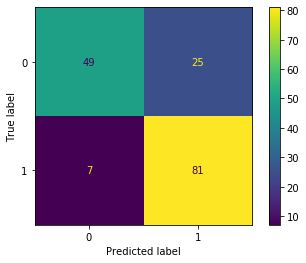

In [59]:
print(metrics.roc_auc_score(y_test,y_pred_rand))
print(metrics.classification_report(y_test,y_pred_rand))
metrics.plot_confusion_matrix(rand,X_test,y_test)
roc_rand = metrics.roc_auc_score(y_test,y_pred_rand)
f1_score_rand = metrics.f1_score(y_test,y_pred_rand)
accura_rand = metrics.accuracy_score(y_test,y_pred_rand)
preci_rand = metrics.precision_score(y_test,y_pred_rand)

### Result Analysis

In [63]:
roc_score = [roc_logi,roc_logicv,roc_clf,roc_rand,roc_xgb]
f1score = [f1_score_logi,f1_score_logicv,f1_score_clf ,f1_score_rand,f1_score_xgb ] 
accurate = [accura_logi,accura_logicv,accura_clf,accura_rand,accura_xgb ]
precision = [preci_logi,preci_logicv,preci_clf,preci_rand,preci_xgb] 

d={'Accuracy':accurate,'ROC_AUC_Score':roc_score,
   'Precision For Yes':precision,'f1-score':f1score}
pd.DataFrame(d,index=['LogisticRegress','LogisticRegressCV','SVM','RandomForest','XGBClassifier'])\
                                        .apply(lambda x:round(x,2) )

# randomforest model was the best

,Accuracy,ROC_AUC_Score,Precision For Yes,f1-score
LogisticRegress,0.67,0.65,0.66,0.72
LogisticRegressCV,0.73,0.71,0.69,0.79
SVM,0.59,0.59,0.62,0.62
RandomForest,0.80,0.79,0.76,0.84
XGBClassifier,0.86,0.86,0.88,0.87


### Deploying the model 
I used the pipeline model to create my pickle file need for the Api

- Using Postman to access the API
<img src='Capture.png' width="800">

- Using Python to access the API 

In [ ]:
# from localhost
URL3 = "http://127.0.0.1:5000/loan"
data3={"Loan_ID":"LP001011","Gender":"Male","Married":"Yes","Dependents":"2",
       "Education":"Graduate","Self_Employed":"Yes","ApplicantIncome":5417,"CoapplicantIncome":4196.0,
                "LoanAmount":267.0,"Loan_Amount_Term":360.0,"Credit_History":1.0,"Property_Area":"Urban"}
r3 = requests.post(url = URL3, json = data3) 
print(r3.json())

### Observersion and Conclusion

In [81]:
# gridcvt.best_params_

NameError: name 'gridcvt' is not defined

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.
Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)


### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation
Combine both incomes as total income and take a log transformation of the same.

## 4. Building a Predictive Model

Try paramater grid search to improve the results

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python